# INTRODUCTION TO 'DATUM' FINAL PROJECT

- Topic : DIABETES PREDICTION
- By Datum Group :
  - Yana Renggana
  - Mohammad Fikri Nur Syahbani
  - Retno Ayu Purborini
  - Putu Yukti Lesmanah
- Pembimbing : Mas Hendy

*Data Science Digital Skola Batch 24*

# Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (RandomForestClassifier, )
from sklearn.metrics import (accuracy_score, 
                             recall_score,
                             f1_score,
                             ConfusionMatrixDisplay, 
                             classification_report,
                             confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Read Data

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Backup Data

In [3]:
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Understanding

**Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.




- Pregnancies - Number of times pregnant

- Glucose - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

- BloodPressure - Diastolic blood pressure (mm Hg)

- SkinThickness - Triceps skin fold thickness (mm)

- Insulin - 2-Hour serum insulin (mu U/ml)

- BMI - Body mass index

- DiabetesPedigreeFunction - Diabetes pedigree function

- Age - Age (years)

- Outcome - Class variable (0 or 1)

# Exploratory Data Analysis

## Check Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Mengecek apakah ada data yang terduplikat atau tidak
df.duplicated().values.any()

False

In [6]:
# Mengecek kolom apa saja yang terdapat dalam dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Mengecek setiap kolom memiliki data type apa saja
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Mengecek unique value yang terdapat pada setiap kolom
for col in df.columns:
    print(col)
    print(df[col].unique())

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [9]:
# Replace Value 0 ke NaN value
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
# Mengecek apakah ada data yang bernilai null atau tidak
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Statistic Descriptive

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Univariate Analysis

### Kolom Outcome

In [12]:
# Check Variable Outcome
px.histogram(df, x='Outcome', color='Outcome', barmode='group')

In [13]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(data)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### Kolom Glucose

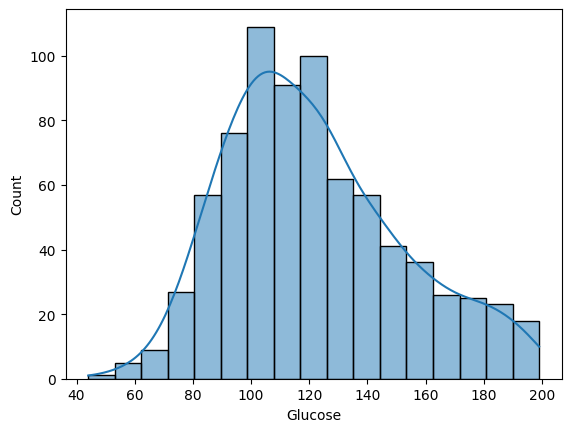

In [14]:
# Menggunakan data dari kolom 'Glucose' dalam DataFrame df
sns.histplot(x='Glucose', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [15]:
color_sequence = ['orangered']
fig = px.box(df, y='Glucose', color_discrete_sequence=color_sequence)
fig.update_layout(title='Box Plot: Glucose')
fig.show()

### Kolom Pregnancies

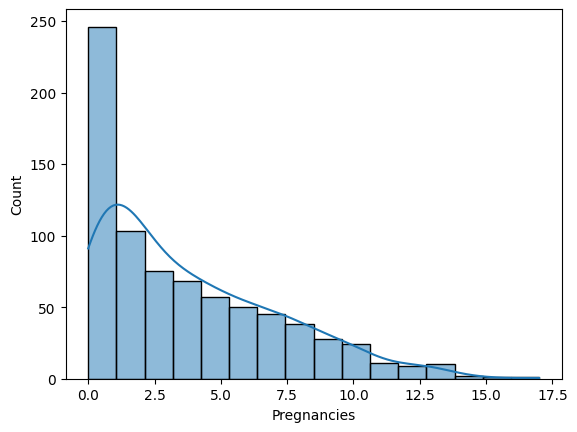

In [16]:
# Menggunakan data dari kolom 'Pregnancies' dalam DataFrame df
sns.histplot(x='Pregnancies', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [17]:
fig1 = px.box(df, y='Pregnancies', color_discrete_sequence=color_sequence)
fig1.update_layout(title='Box Plot: Pregnancies')
fig1.show()

### Kolom BloodPressure

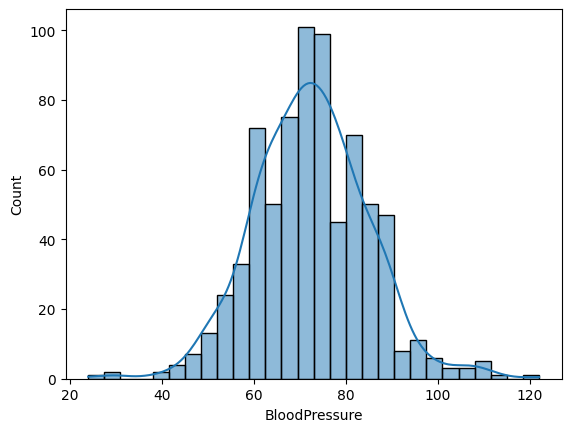

In [18]:
# Menggunakan data dari kolom 'BloodPressure' dalam DataFrame df
sns.histplot(x='BloodPressure', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [19]:
fig3 = px.box(df, y='BloodPressure', color_discrete_sequence=color_sequence)
fig3.update_layout(title='Box Plot: BloodPressure')
fig3.show()

### Kolom SkinThickness

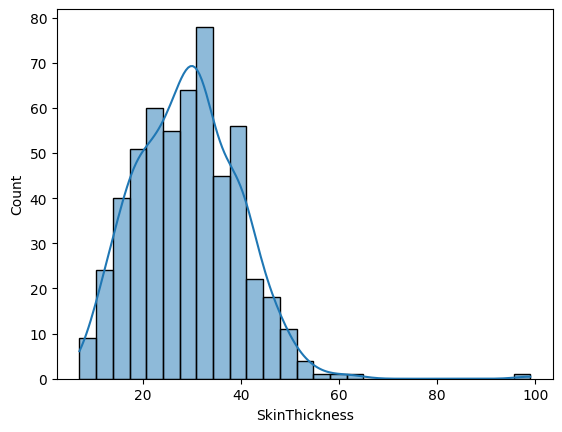

In [20]:
# Menggunakan data dari kolom 'SkinThickness' dalam DataFrame df
sns.histplot(x='SkinThickness', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [21]:
fig4 = px.box(df, y='SkinThickness', color_discrete_sequence=color_sequence)
fig4.update_layout(title='Box Plot: SkinThickness')
fig4.show()

### Kolom Insulin

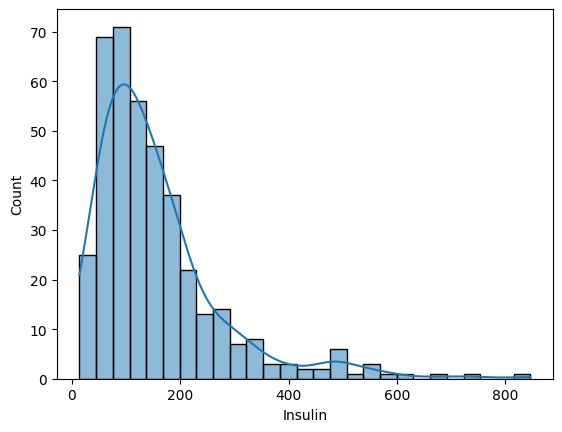

In [22]:
# Menggunakan data dari kolom 'Insulin' dalam DataFrame df
sns.histplot(x='Insulin', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [23]:
fig5 = px.box(df, y='Insulin', color_discrete_sequence=color_sequence)
fig5.update_layout(title='Box Plot: Insulin')
fig5.show()

### Kolom BMI

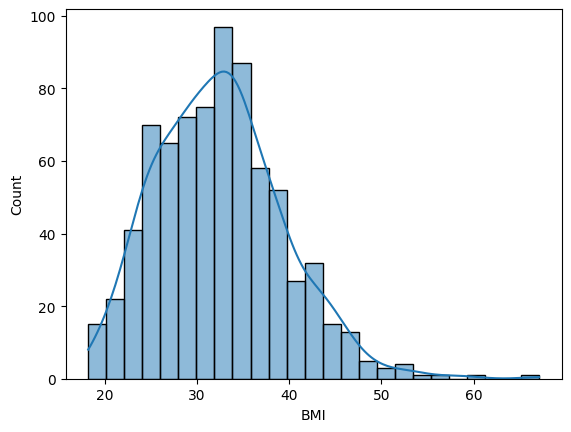

In [24]:
# Menggunakan data dari kolom 'BMI' dalam DataFrame df
sns.histplot(x='BMI', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [25]:
fig6 = px.box(df, y='BMI', color_discrete_sequence=color_sequence)
fig6.update_layout(title='Box Plot: BMI')
fig6.show()

### Kolom DiabetesPedigreeFunction

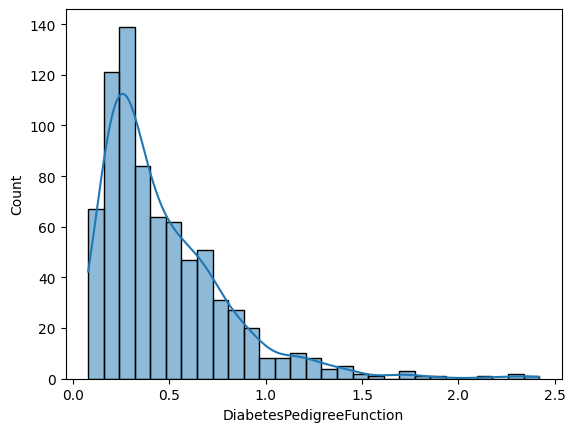

In [26]:
# Menggunakan data dari kolom 'DiabetesPedigreeFunction' dalam DataFrame df
sns.histplot(x='DiabetesPedigreeFunction', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [27]:
fig7 = px.box(df, y='DiabetesPedigreeFunction', color_discrete_sequence=color_sequence)
fig7.update_layout(title='Box Plot: DiabetesPedigreeFunction')
fig7.show()

### Kolom Age

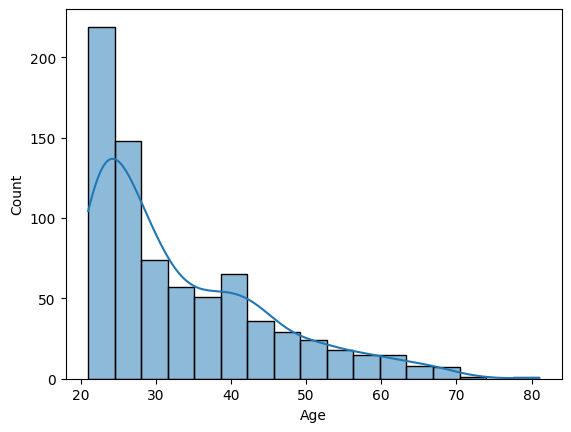

In [28]:
# Menggunakan data dari kolom 'Age' dalam DataFrame df
sns.histplot(x='Age', data=df, kde=True)

# Menampilkan plot histogram
plt.show()

In [29]:
fig8 = px.box(df, y='Age', color_discrete_sequence=color_sequence)
fig8.update_layout(title='Box Plot: Age')
fig8.show()

## Bivariate Analysis

In [30]:
fig = px.histogram(df, x='Pregnancies', color='Outcome', barmode='stack')
fig.update_layout(title='Pregnancies')
fig.show()

In [31]:
fig = px.histogram(df, x='Glucose', color='Outcome', barmode='stack')
fig.update_layout(title='Glucose')
fig.show()

In [32]:
fig = px.histogram(df, x='BloodPressure', color='Outcome', barmode='stack')
fig.update_layout(title='BloodPressure')
fig.show()

In [33]:
fig = px.histogram(df, x='SkinThickness', color='Outcome', barmode='stack')
fig.update_layout(title='SkinThickness')
fig.show()

In [34]:
fig = px.histogram(df, x='Insulin', color='Outcome', barmode='stack')
fig.update_layout(title='Insulin')
fig.show()

In [35]:
fig = px.histogram(df, x='BMI', color='Outcome', barmode='stack')
fig.update_layout(title='BMI')
fig.show()

In [36]:
fig = px.histogram(df, x='DiabetesPedigreeFunction', color='Outcome', barmode='stack')
fig.update_layout(title='DiabetesPedigreeFunction')
fig.show()

In [37]:
fig = px.histogram(df, x='Age', color='Outcome', barmode='stack')
fig.update_layout(title='Age')
fig.show()

## Multivariate Analysis

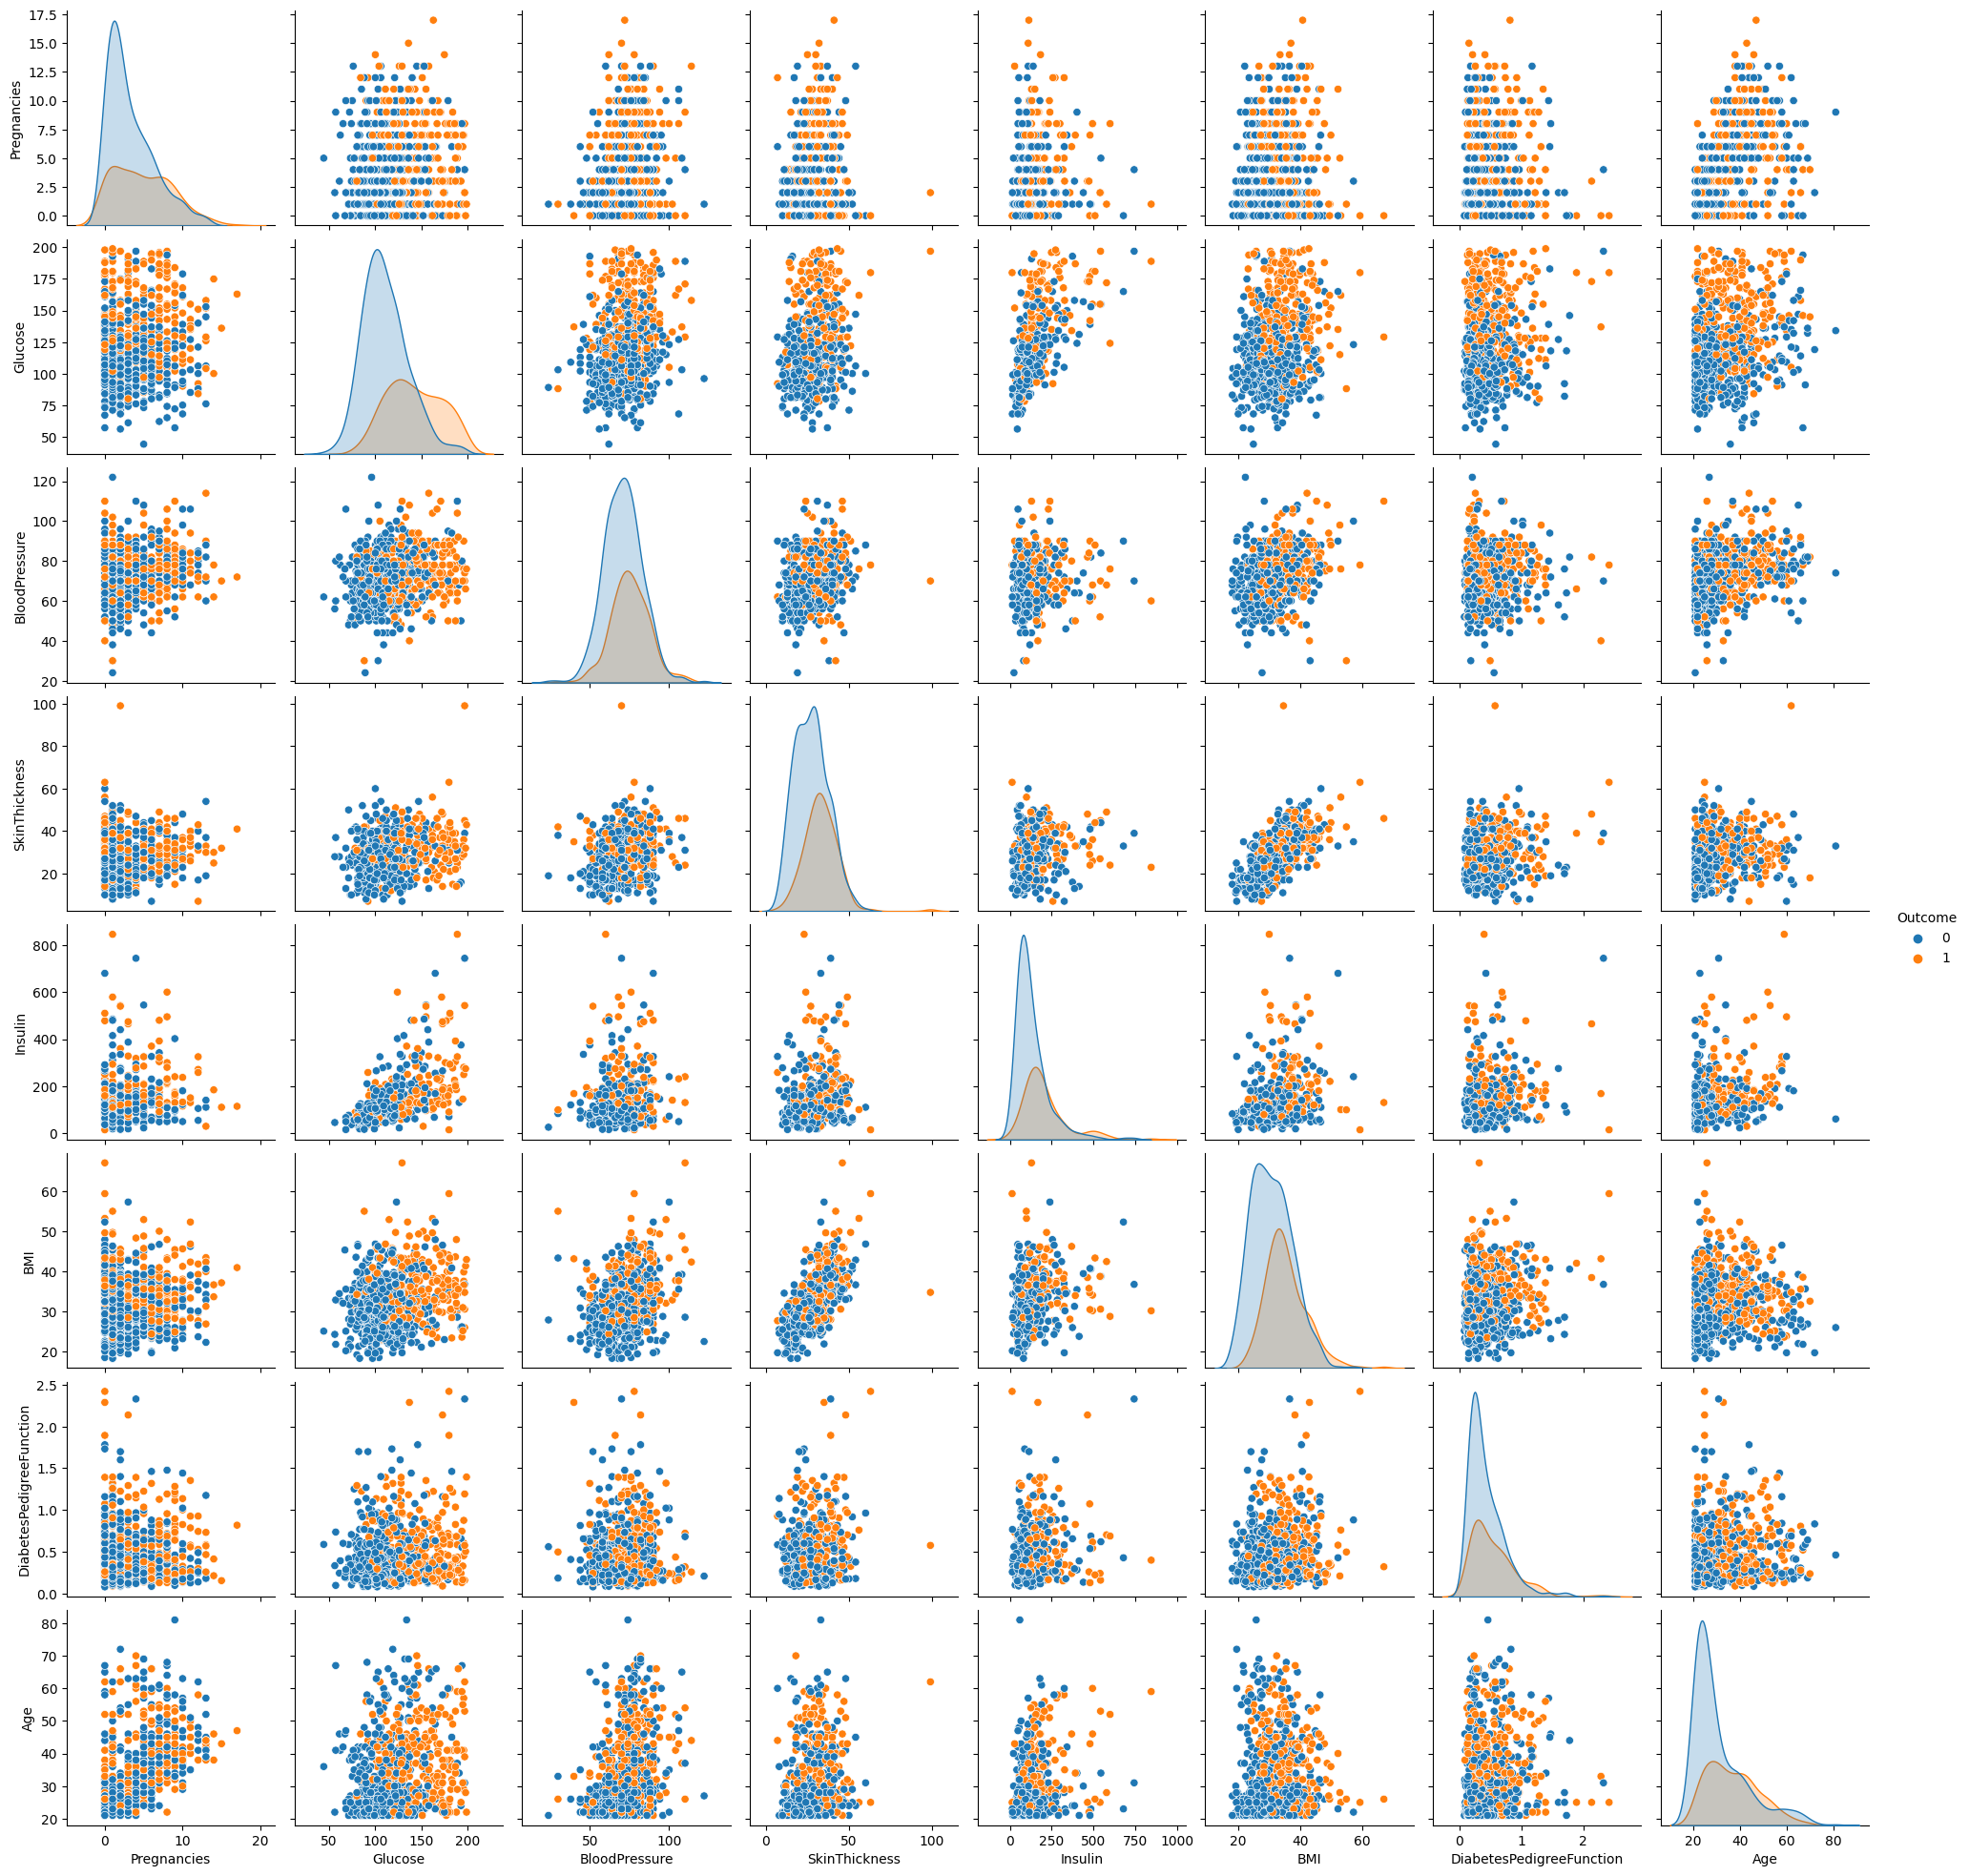

In [38]:
sns.pairplot(df,hue='Outcome')

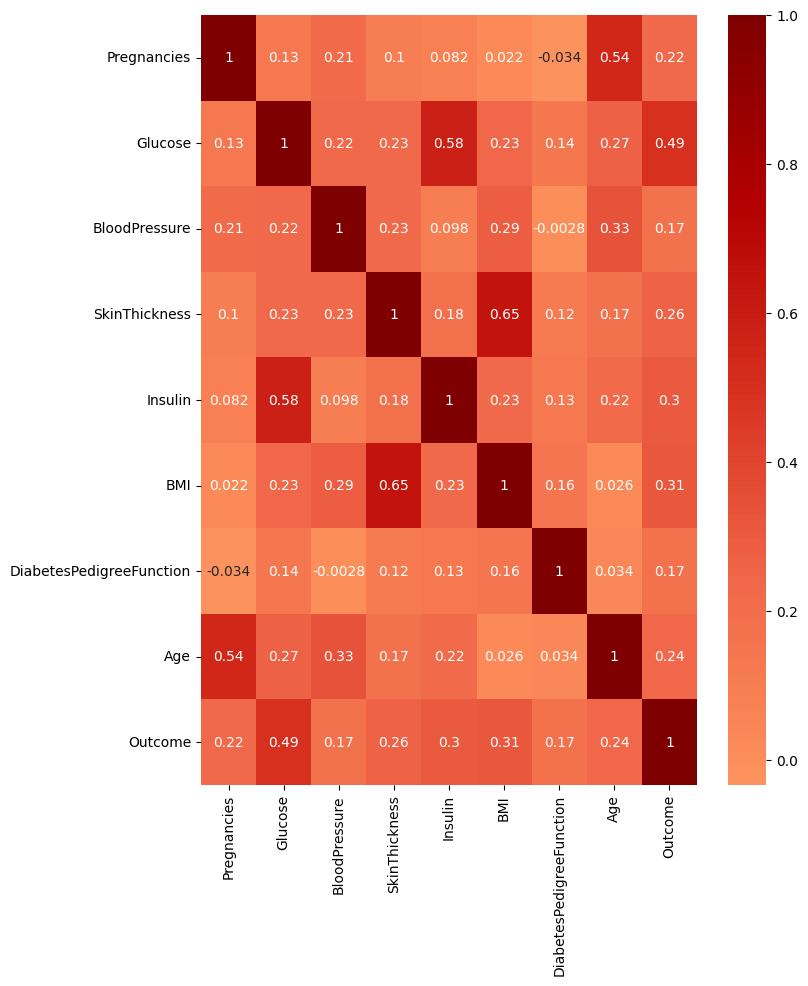

In [39]:
plt.figure(figsize = (8,10))
sns.heatmap(df.corr(), center = 0, cmap = 'OrRd', annot = True)
plt.show()

# Data Preprocessing

## Replace Missing Value
<img src='img/Screenshot 2023-05-16 120508.jpg'></>

In [40]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

def mean_target(var):
    temp1 = df[df[var].notnull()]
    temp1 = temp1[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp1

In [41]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [42]:
mean_target('Glucose')

,Outcome,Glucose
0,0,110.643863
1,1,142.319549


In [43]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [44]:
mean_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.877339
1,1,75.321429


In [45]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [46]:
mean_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.235457
1,1,33.000000


In [47]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [48]:
mean_target('Insulin')

,Outcome,Insulin
0,0,130.287879
1,1,206.846154


In [49]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [50]:
mean_target('BMI')

,Outcome,BMI
0,0,30.859674
1,1,35.406767


In [51]:
# Mereplace Nilai Null dengan Nilai Mean Glucose
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 110.64
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 142.32

In [52]:
# Mereplace Nilai Null dengan Nilai Mean BloodPressure
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.88
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 75.32

In [53]:
# Mereplace Nilai Null dengan Nilai Median Skinthickness
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [54]:
# Mereplace Nilai Null dengan Nilai Median Insulin
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 130.29
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 206.85

In [55]:
# Mereplace Nilai Null dengan Nilai Median BMI
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.10
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.30

# Modelling

## Train Test 80:20

In [63]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan StandardScaler pada data latih dan uji
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Melatih model logistik pada data yang telah di-resampling dan di-scaling
model = LogisticRegression()
model.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = model.predict(X_resampled_scaled)
y_test_pred = model.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Training Accuracy Score: 0.794
Testing Accuracy Score: 0.844
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       107
           1       0.69      0.89      0.78        47

    accuracy                           0.84       154
   macro avg       0.82      0.86      0.83       154
weighted avg       0.87      0.84      0.85       154



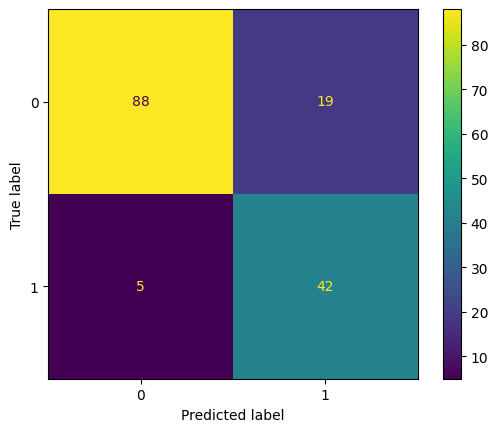

In [69]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [70]:
# Melatih model logistik pada data yang telah di-resampling
modelXGB = XGBClassifier()

modelXGB.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelXGB.predict(X_resampled_scaled)
y_test_pred = modelXGB.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       107
           1       0.72      0.89      0.80        47

    accuracy                           0.86       154
   macro avg       0.84      0.87      0.85       154
weighted avg       0.88      0.86      0.87       154



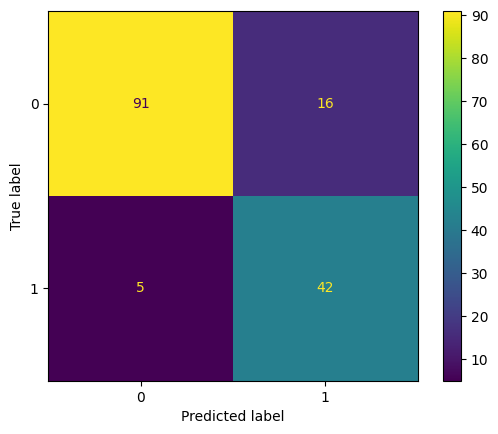

In [72]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 0.899
Testing Accuracy Score: 0.838
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       107
           1       0.68      0.87      0.77        47

    accuracy                           0.84       154
   macro avg       0.81      0.85      0.82       154
weighted avg       0.86      0.84      0.84       154



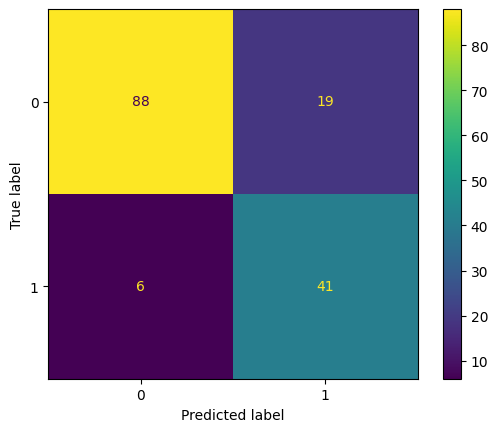

In [75]:
# Melatih model logistik pada data yang telah di-resampling
modelSVC = SVC()

modelSVC.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelSVC.predict(X_resampled_scaled)
y_test_pred = modelSVC.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 0.887
Testing Accuracy Score: 0.805
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       107
           1       0.63      0.85      0.73        47

    accuracy                           0.81       154
   macro avg       0.78      0.82      0.79       154
weighted avg       0.84      0.81      0.81       154



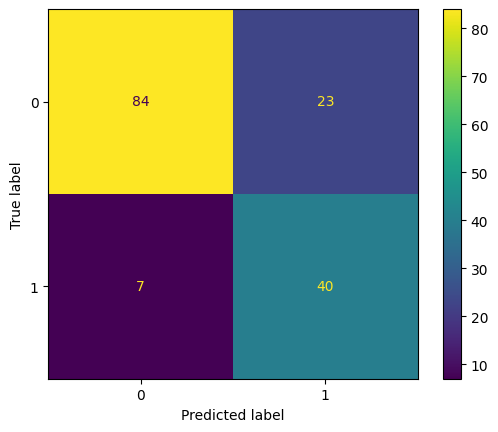

In [76]:
# Melatih model logistik pada data yang telah di-resampling
modelKNC = KNeighborsClassifier()

modelKNC.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelKNC.predict(X_resampled_scaled)
y_test_pred = modelKNC.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.857
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       107
           1       0.70      0.94      0.80        47

    accuracy                           0.86       154
   macro avg       0.83      0.88      0.84       154
weighted avg       0.89      0.86      0.86       154



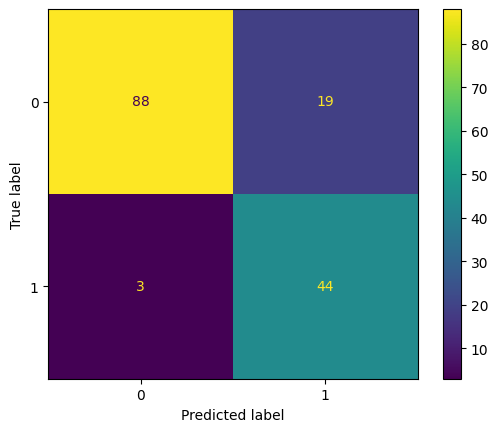

In [77]:
# Melatih model logistik pada data yang telah di-resampling
modelDT = DecisionTreeClassifier()

modelDT.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelDT.predict(X_resampled_scaled)
y_test_pred = modelDT.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.890
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       107
           1       0.77      0.91      0.83        47

    accuracy                           0.89       154
   macro avg       0.86      0.90      0.88       154
weighted avg       0.90      0.89      0.89       154



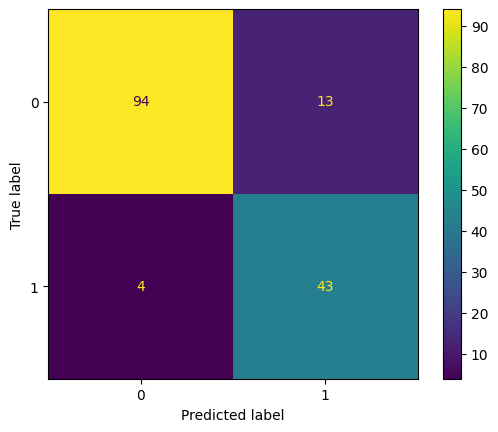

In [82]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
estimators =[('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking = StackingClassifier(estimators=estimators,
final_estimator=LogisticRegression())

stacking.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = stacking.predict(X_resampled_scaled)
y_test_pred = stacking.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Train Test 70:30

In [83]:
# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan StandardScaler pada data latih dan uji
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Melatih model logistik pada data yang telah di-resampling dan di-scaling
model_lr_73 = LogisticRegression()
model_lr_73.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = model_lr_73.predict(X_resampled_scaled)
y_test_pred = model_lr_73.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Training Accuracy Score: 0.799
Testing Accuracy Score: 0.805
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       157
           1       0.68      0.73      0.71        74

    accuracy                           0.81       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.81      0.81      0.81       231



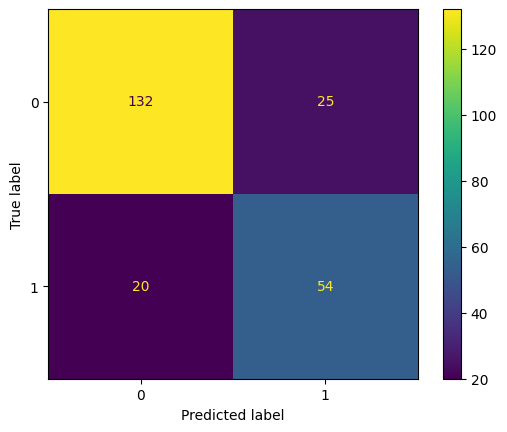

In [84]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.883
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       157
           1       0.81      0.84      0.82        74

    accuracy                           0.88       231
   macro avg       0.86      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231



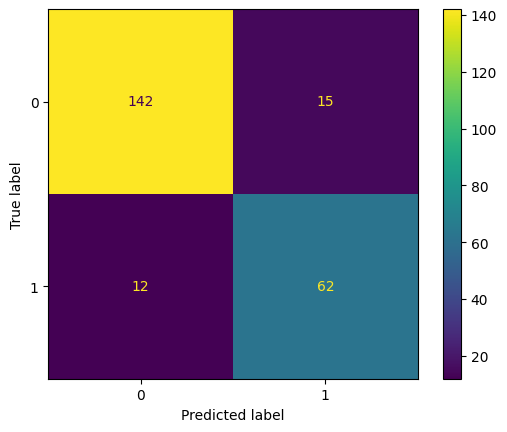

In [85]:
# Melatih model logistik pada data yang telah di-resampling
modelXGB_73 = XGBClassifier()

modelXGB_73.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelXGB_73.predict(X_resampled_scaled)
y_test_pred = modelXGB_73.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 0.889
Testing Accuracy Score: 0.844
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       157
           1       0.74      0.80      0.77        74

    accuracy                           0.84       231
   macro avg       0.82      0.83      0.82       231
weighted avg       0.85      0.84      0.85       231



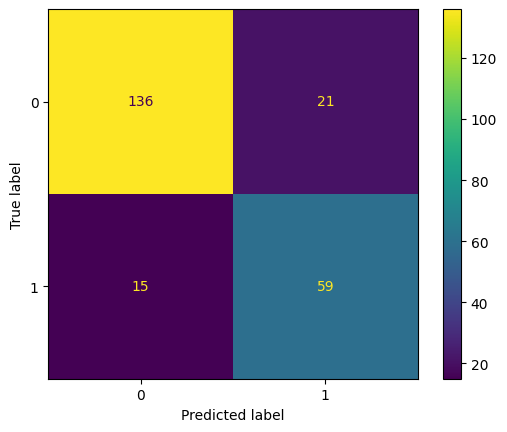

In [86]:
# Melatih model logistik pada data yang telah di-resampling
modelSVC_73 = SVC()

modelSVC_73.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelSVC_73.predict(X_resampled_scaled)
y_test_pred = modelSVC_73.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 0.880
Testing Accuracy Score: 0.831
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       157
           1       0.70      0.84      0.76        74

    accuracy                           0.83       231
   macro avg       0.81      0.83      0.82       231
weighted avg       0.85      0.83      0.83       231



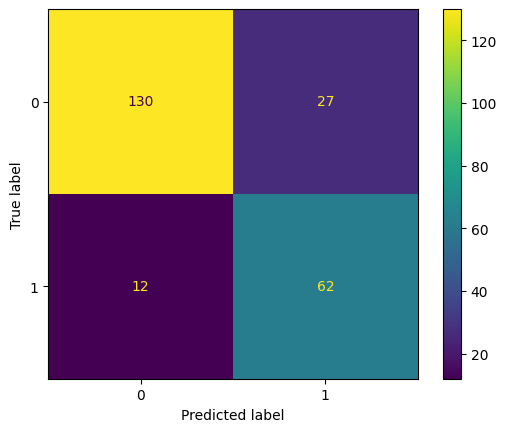

In [87]:
# Melatih model logistik pada data yang telah di-resampling
modelKNC_73 = KNeighborsClassifier()

modelKNC_73.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelKNC_73.predict(X_resampled_scaled)
y_test_pred = modelKNC_73.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.874
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       157
           1       0.80      0.81      0.81        74

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



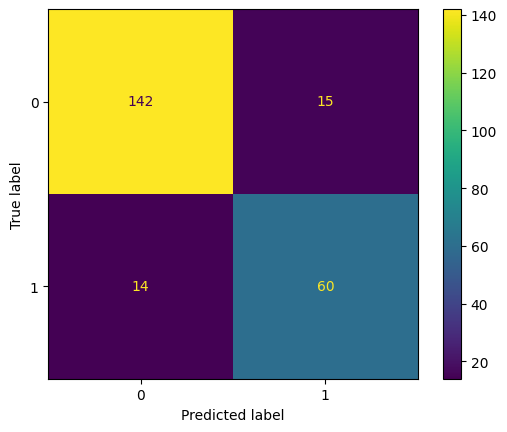

In [88]:
# Melatih model logistik pada data yang telah di-resampling
modelDT_73 = DecisionTreeClassifier()

modelDT_73.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelDT_73.predict(X_resampled_scaled)
y_test_pred = modelDT_73.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.883
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       157
           1       0.80      0.85      0.82        74

    accuracy                           0.88       231
   macro avg       0.86      0.87      0.87       231
weighted avg       0.89      0.88      0.88       231



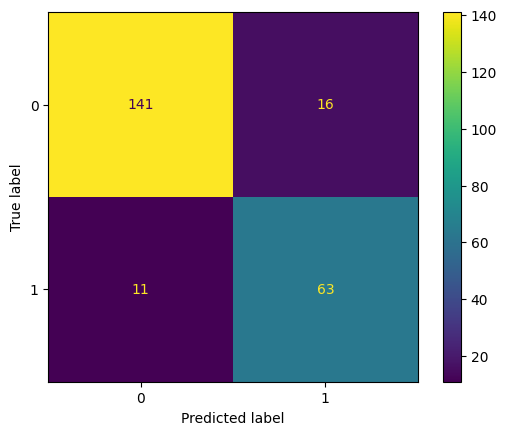

In [89]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
estimators =[('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking = StackingClassifier(estimators=estimators,
final_estimator=LogisticRegression())

stacking.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = stacking.predict(X_resampled_scaled)
y_test_pred = stacking.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Train Test 60:40

In [90]:
# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menerapkan StandardScaler pada data latih dan uji
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Melatih model logistik pada data yang telah di-resampling dan di-scaling
model_lr_64 = LogisticRegression()
model_lr_64.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = model_lr_64.predict(X_resampled_scaled)
y_test_pred = model_lr_64.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Training Accuracy Score: 0.790
Testing Accuracy Score: 0.792
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       205
           1       0.69      0.68      0.69       103

    accuracy                           0.79       308
   macro avg       0.77      0.76      0.77       308
weighted avg       0.79      0.79      0.79       308



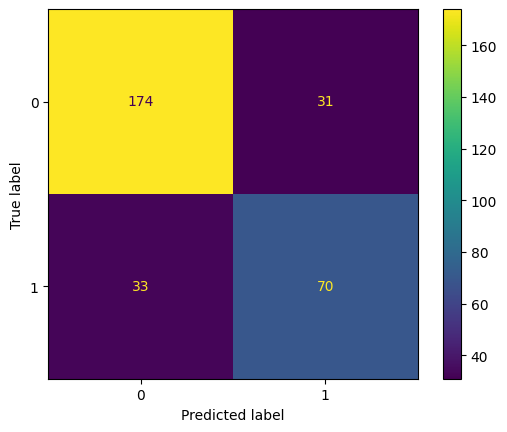

In [91]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.899
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       205
           1       0.83      0.88      0.85       103

    accuracy                           0.90       308
   macro avg       0.88      0.90      0.89       308
weighted avg       0.90      0.90      0.90       308



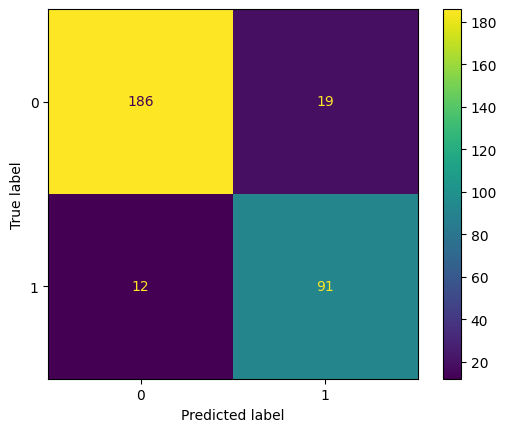

In [92]:
# Melatih model logistik pada data yang telah di-resampling
modelXGB_64 = XGBClassifier()

modelXGB_64.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelXGB_64.predict(X_resampled_scaled)
y_test_pred = modelXGB_64.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 0.888
Testing Accuracy Score: 0.831
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       205
           1       0.75      0.74      0.75       103

    accuracy                           0.83       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.83      0.83      0.83       308



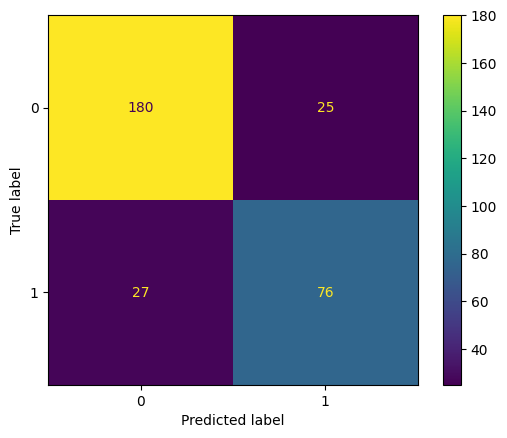

In [93]:
# Melatih model logistik pada data yang telah di-resampling
modelSVC_64 = SVC()

modelSVC_64.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelSVC_64.predict(X_resampled_scaled)
y_test_pred = modelSVC_64.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 0.883
Testing Accuracy Score: 0.776
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       205
           1       0.63      0.80      0.70       103

    accuracy                           0.78       308
   macro avg       0.76      0.78      0.76       308
weighted avg       0.80      0.78      0.78       308



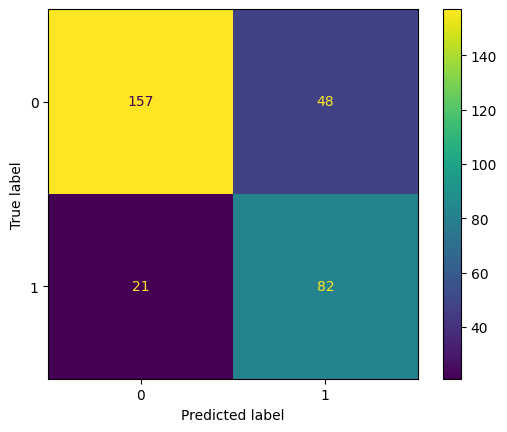

In [94]:
# Melatih model logistik pada data yang telah di-resampling
modelKNC_64 = KNeighborsClassifier()

modelKNC_64.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelKNC_64.predict(X_resampled_scaled)
y_test_pred = modelKNC_64.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.834
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       205
           1       0.72      0.83      0.77       103

    accuracy                           0.83       308
   macro avg       0.81      0.83      0.82       308
weighted avg       0.84      0.83      0.84       308



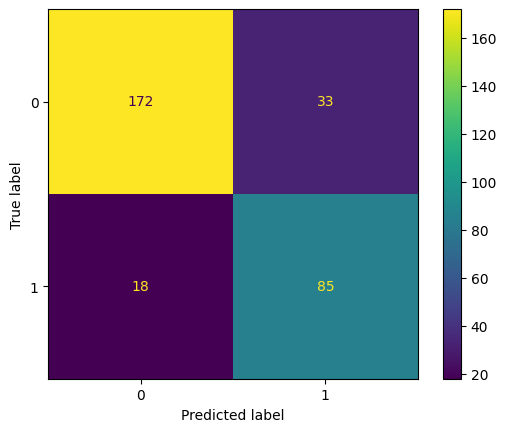

In [95]:
# Melatih model logistik pada data yang telah di-resampling
modelDT_64 = DecisionTreeClassifier()

modelDT_64.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = modelDT_64.predict(X_resampled_scaled)
y_test_pred = modelDT_64.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy Score: 1.000
Testing Accuracy Score: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       205
           1       0.80      0.81      0.80       103

    accuracy                           0.87       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.87      0.87      0.87       308



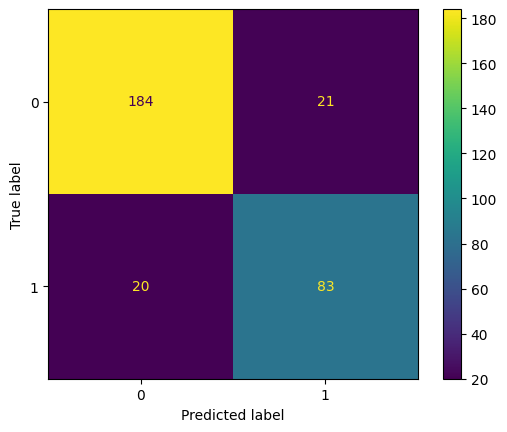

In [96]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state= 42)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
estimators =[('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking = StackingClassifier(estimators=estimators,
final_estimator=LogisticRegression())

stacking.fit(X_resampled_scaled, y_resampled)

# Melakukan prediksi label pada data latih dan uji
y_train_pred = stacking.predict(X_resampled_scaled)
y_test_pred = stacking.predict(X_test_scaled)

# Menghitung akurasi pada data latih dan uji
train_accuracy = accuracy_score(y_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluasi model
print('Training Accuracy Score: {:.3f}'.format(train_accuracy))
print('Testing Accuracy Score: {:.3f}'.format(test_accuracy))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()